# COVID-19 Data Analysis Part 2

Import the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Import the dataset of COVID-19 death cases

File is available at https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases

In [2]:
corona_dataset_csv = pd.read_csv("covid19_deaths_global.csv")
print(corona_dataset_csv.shape)
corona_dataset_csv.head(10)

(266, 182)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,936,957,971,994,1010,1012,1048,1094,1113,1147
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,83,83,85,89,93,95,97,101,104,107
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,978,988,996,1004,1011,1018,1028,1040,1052,1057
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,21,22,23,23,26,26,26,27,28,29
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,1694,1720,1774,1810,1845,1903,1968,2050,2112,2178
7,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,521,535,546,559,565,573,581,592,607,620
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
9,New South Wales,Australia,-33.86880,151.209300,0,0,0,0,0,0,...,49,49,49,49,49,49,49,49,49,49


### Delete unnecesary rows and aggregate rows by country

In [3]:
df1 = corona_dataset_csv.drop(["Lat", "Long"], axis = 1)
df1_aggregated = df1.groupby("Country/Region").sum()
print(df1_aggregated.shape)
df1_aggregated.head(10)

(188, 178)


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,936,957,971,994,1010,1012,1048,1094,1113,1147
Albania,0,0,0,0,0,0,0,0,0,0,...,83,83,85,89,93,95,97,101,104,107
Algeria,0,0,0,0,0,0,0,0,0,0,...,978,988,996,1004,1011,1018,1028,1040,1052,1057
Andorra,0,0,0,0,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
Angola,0,0,0,0,0,0,0,0,0,0,...,21,22,23,23,26,26,26,27,28,29
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
Argentina,0,0,0,0,0,0,0,0,0,0,...,1694,1720,1774,1810,1845,1903,1968,2050,2112,2178
Armenia,0,0,0,0,0,0,0,0,0,0,...,521,535,546,559,565,573,581,592,607,620
Australia,0,0,0,0,0,0,0,0,0,0,...,106,106,107,108,108,108,111,113,116,118


#### Find max death rates for all the countries

In [4]:
countries = list(df1_aggregated.index)
max_death = []
for c in countries:
    max_death.append(df1_aggregated.loc[c].diff().max())
df1_aggregated["max_death"] = max_death
##### Dataframe with only max death rates
corona_data = pd.DataFrame(df1_aggregated["max_death"])
corona_data.head()

,max_death
Country/Region,
Afghanistan,46.0
Albania,4.0
Algeria,30.0
Andorra,4.0
Angola,3.0


In [5]:
happy = pd.read_csv("world_happiness_2019.csv")
happy.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [6]:
useless = ["Overall rank", "Score", "Generosity", "Perceptions of corruption"]
happy.drop(useless, axis=1, inplace=True)
happy.set_index("Country or region", inplace=True)
happy.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [7]:
data = corona_data.join(happy, how="inner")
data.head()

,max_death,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,46.0,0.350,0.517,0.361,0.000
Albania,4.0,0.947,0.848,0.874,0.383
Algeria,30.0,1.002,1.160,0.785,0.086
Argentina,82.0,1.092,1.432,0.881,0.471
Armenia,19.0,0.850,1.055,0.815,0.283


#### Find the correlations

In [8]:
data.corr()

,max_death,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_death,1.000000,0.199831,0.124775,0.224158,0.087602
GDP per capita,0.199831,1.000000,0.757521,0.859431,0.394799
Social support,0.124775,0.757521,1.000000,0.751632,0.456317
Healthy life expectancy,0.224158,0.859431,0.751632,1.000000,0.423146
Freedom to make life choices,0.087602,0.394799,0.456317,0.423146,1.000000


#### Plotting GDP vs max death rate

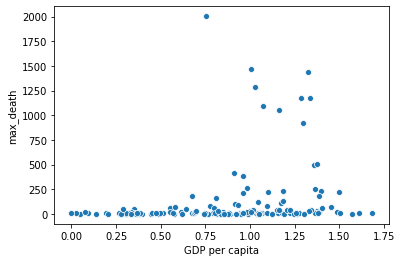

In [9]:
x = data["GDP per capita"]
y = data["max_death"]
sns.scatterplot(x, y)

Need to rescale using log(y)

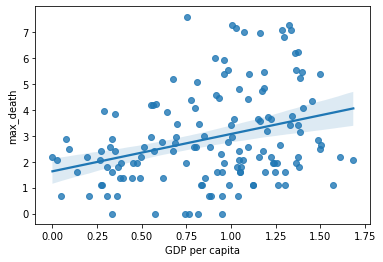

In [10]:
sns.regplot(x, np.log(y+1)) # Need to +1 or else there will be error, because log(0) is error

#### Plotting Social support vs max infection rate

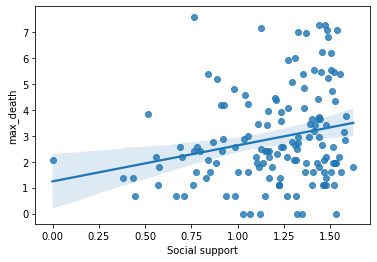

In [11]:
x = data["Social support"]
sns.regplot(x, np.log(y+1))

#### Plotting Healthy life expectancy vs max infection rate

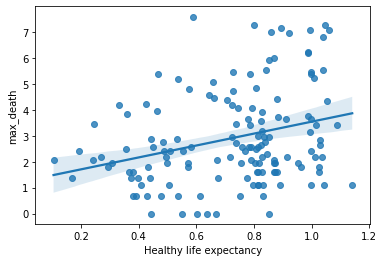

In [12]:
x = data["Healthy life expectancy"]
sns.regplot(x, np.log(y+1))

#### Plotting Freedom to make life choices vs max infection rate

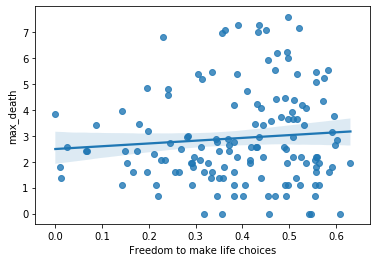

In [13]:
x = data["Freedom to make life choices"]
sns.regplot(x, np.log(y+1))